## Nikki La

# Project 2: Diabetes
### This dataset was found on Kaggle, it is named "Diabetes dataset".
### The problem/goal: Predicting the likelihood of an individual having diabetes based on various health-related features.
### Why? Diabetes is a prevalent health concern, and predicting its risk can aid in early detection and intervention.

### Link: https://www.kaggle.com/datasets/piyushborhade/diabetes-dataset/data

In [1]:
# Standard libraries
import warnings

# External libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

# Keras imports
from keras.models import Sequential
from keras.layers import Dense

# Ignore warnings
warnings.filterwarnings("ignore")

## Loading and Cleaning the Data

In [2]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


There are 8 features and Outcome is the target variable.

- Pregnancies
- Glucose
- BloodPressure 
- SkinThickness
- Insulin
- BMI (Body mass index)
- DiabetesPedigreeFunction
- Age

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# Drop duplicates
df = df.drop_duplicates()

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


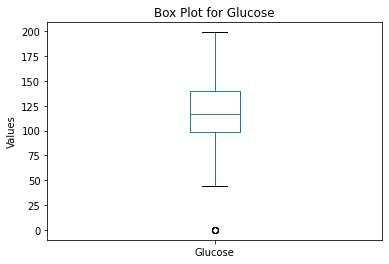

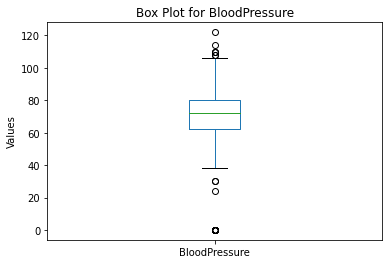

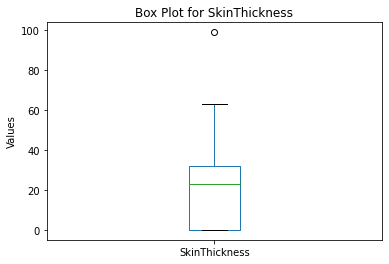

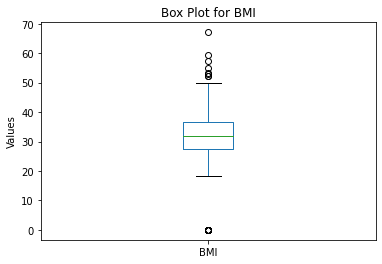

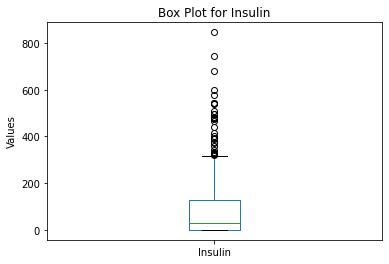

In [6]:
# Box plots for specific columns that cannot have a min value of 0
columns_to_plot = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']
for column in columns_to_plot:
    plt.figure(figsize=(6, 4))
    df[column].plot(kind='box')
    plt.title(f'Box Plot for {column}')
    plt.ylabel('Values')
    plt.show()

In [7]:
print(df[df['BloodPressure']==0].shape[0])

print(df[df['Glucose']==0].shape[0])

print(df[df['SkinThickness']==0].shape[0])

print(df[df['BMI']==0].shape[0])

print(df[df['Insulin']==0].shape[0])
# There are a lot of 0 values as seen below

35
5
227
11
374


In the dataset, some columns have a skewed distribution, meaning that outliers can heavily affect the mean compared to the median. "Glucose" and "Blood Pressure" have normal distributions. To handle zero values in these columns, we replace them with the mean.

However, "Skin Thickness," "Insulin," and "BMI" have skewed distributions, making the median a better measure because it's less affected by outliers. So, for these columns, we replace zero values with the median for a more accurate result.

In [8]:
# Mean value adjusted
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].mean())

df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].mean())

# Median value adjusted
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].median())

df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].median())

df['BMI'] = df['BMI'].replace(0, df['BMI'].median())

In [9]:
print(df[df['BloodPressure']==0].shape[0])

print(df[df['Glucose']==0].shape[0])

print(df[df['SkinThickness']==0].shape[0])

print(df[df['BMI']==0].shape[0])

print(df[df['Insulin']==0].shape[0])
# No more 0 values

0
0
0
0
0


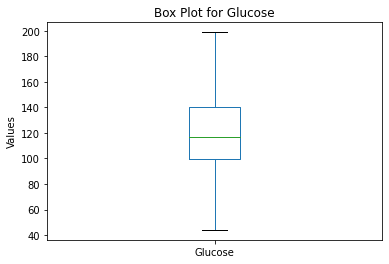

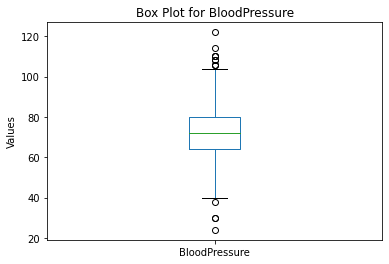

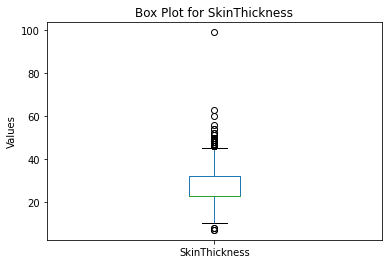

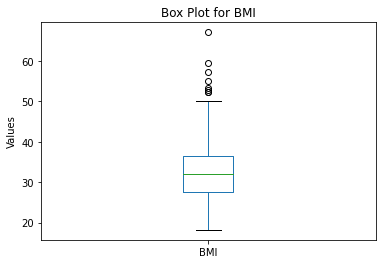

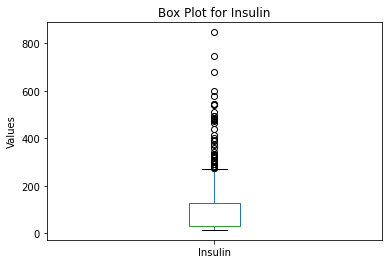

In [10]:
# Updated box plots
columns_to_plot = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']
for column in columns_to_plot:
    plt.figure(figsize=(6, 4))
    df[column].plot(kind='box')
    plt.title(f'Box Plot for {column}')
    plt.ylabel('Values')
    plt.show()

# EDA

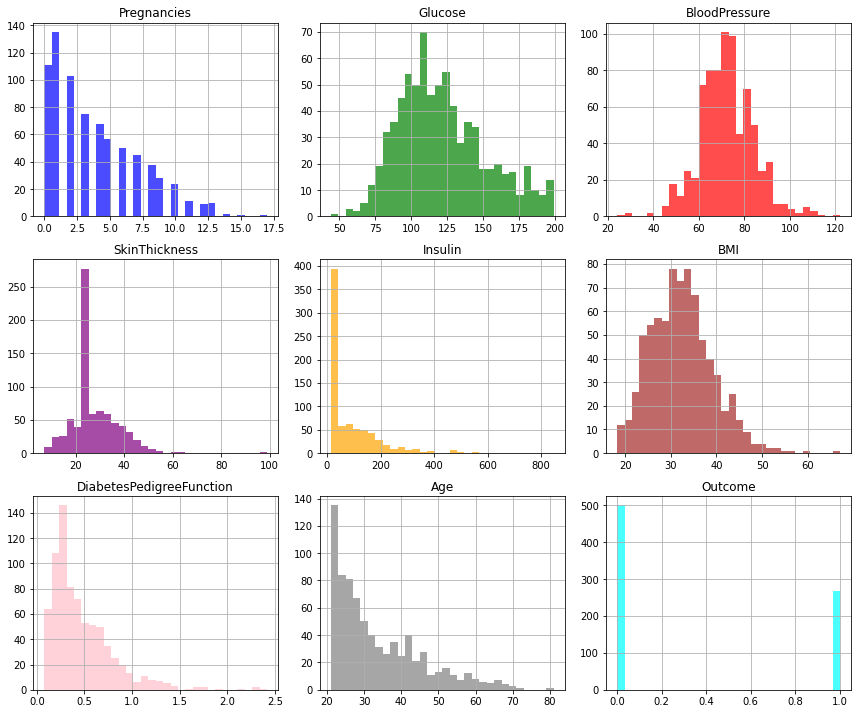

In [11]:
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray', 'cyan']

fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (12, 10))
axes = axes.flatten()

for i, (col, color) in enumerate(zip(df.columns, colors)):
    # Plot histogram for each column with specified color
    df[col].hist(bins = 30, ax = axes[i], color = color, alpha = 0.7)
    axes[i].set_title(col)

plt.tight_layout(True)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

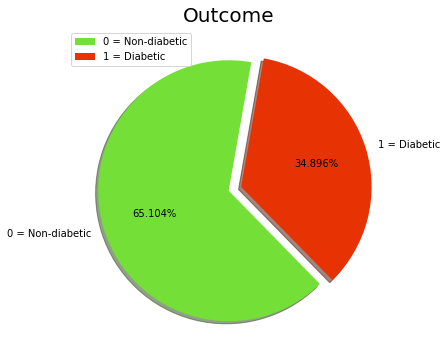

In [12]:
labels = ['0 = Non-diabetic', '1 = Diabetic'] 
diagnosis_counts = df['Outcome'].value_counts()

# bright green = Non-diabetic, bright red = Diabetic
colors = ['#74E037', '#E73303']
explode = [0, 0.1]

# Create a pie plot
plt.figure(figsize = (6, 6))
plt.pie(diagnosis_counts, colors = colors, explode = explode, labels = labels, shadow = True, 
        startangle = 80, autopct='%.3f%%')
plt.title('Outcome',fontsize = 20)
plt.axis('off')
plt.legend()
plt.show

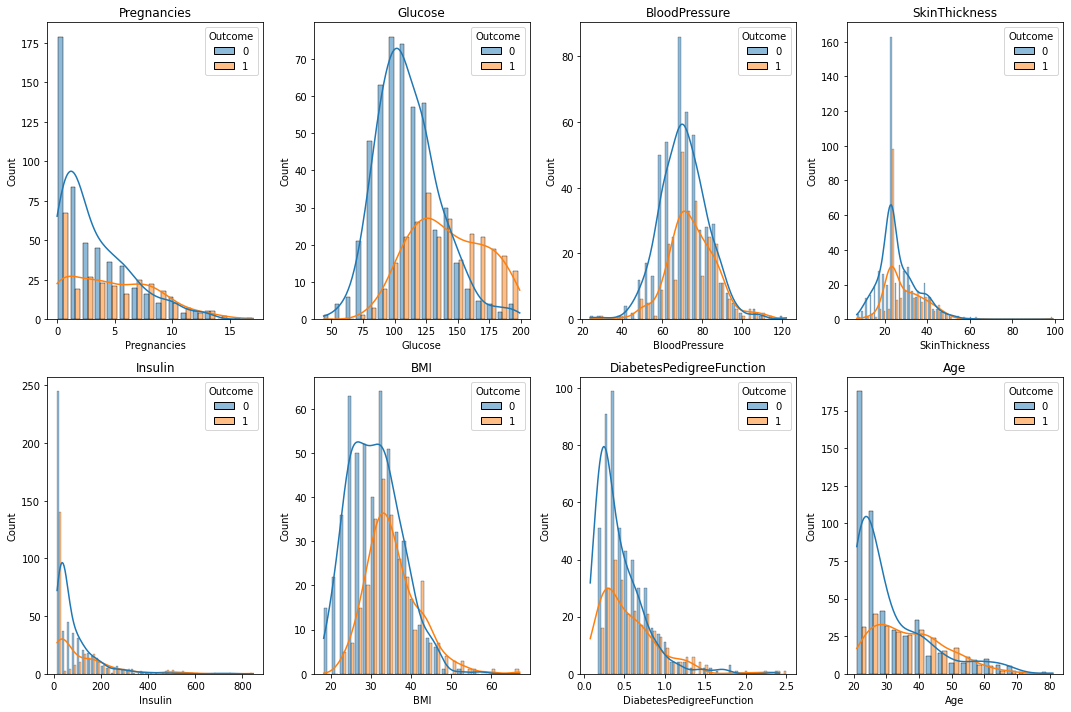

In [13]:
hue_var = 'Outcome'

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
axes = axes.flatten()

# Loop through each feature and plot the histogram
for i, col in enumerate(df.columns[:-1][:9]): 
    sns.histplot(data=df, x=col, hue=hue_var, shrink=0.8, multiple="dodge", kde=True, ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

## Declare feature vector and target variable

In [14]:
# Feature vector
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]

# Target variable
y = df['Outcome']

## Feature Scaling

In [15]:
cols = X.columns

ms = MinMaxScaler()

X = ms.fit_transform(X)
X = pd.DataFrame(X, columns=[cols])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.670968,0.489796,0.304348,0.019832,0.314928,0.234415,0.483333
1,0.058824,0.264516,0.428571,0.239130,0.019832,0.171779,0.116567,0.166667
2,0.470588,0.896774,0.408163,0.173913,0.019832,0.104294,0.253629,0.183333
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000


In [16]:
scaler = StandardScaler()

# Apply the StandardScaler
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.63994726,  0.86527574, -0.0210444 , ...,  0.16724016,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20598931, -0.51658286, ..., -0.85155088,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01597855, -0.68176235, ..., -1.33183808,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02240928, -0.0210444 , ..., -0.90976751,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14197684, -1.01212132, ..., -0.34215536,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94297153, -0.18622389, ..., -0.29849289,
        -0.47378505, -0.87137393]])

# Unsupervised ML Algorithm

## K-means Clustering

In [17]:
# Examine for a single k-means model:
k = 5
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
kmeans.fit(X)

kmeans.inertia_

83.83453287556343

In [18]:
# Define the maximum number of clusters (k_max) to try
k_max = 10

# Create a list of KMeans models
kmeans_models = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(X_scaled)
                 for k in range(1, k_max+1)]

# Get the inertias:
inertias = [model.inertia_ for model in kmeans_models]

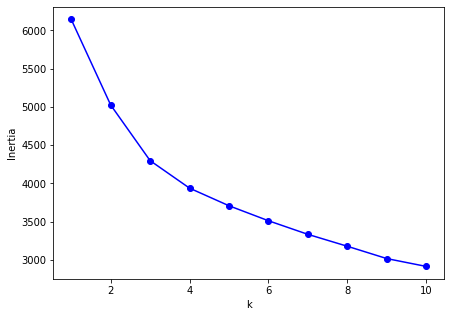

In [19]:
# Plot
fig, ax1 = plt.subplots(1,1, figsize=(7,5))

# Plot the inertias against the number of clusters (k)
ax1.plot(range(1, k_max+1), inertias, "bo-")

ax1.set_xlabel('k')
ax1.set_ylabel('Inertia');

In [20]:
labels = kmeans.labels_

# To see how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 132 out of 768 samples were correctly labeled.


We obtained a very weak classification accuracy of 17% by our unsupervised model.

In [21]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.17


In [22]:
scores = [silhouette_score(X, model.labels_) for model in kmeans_models[1:]]

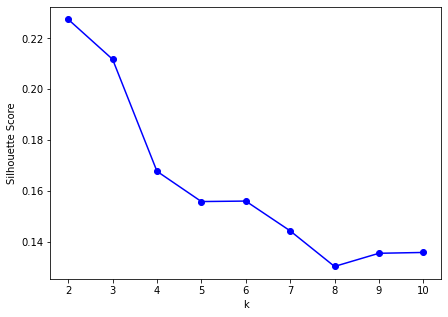

In [23]:
#Plot:
fig, ax1 = plt.subplots(1,1, figsize=(7,5))

ax1.plot(range(2, k_max+1), scores, "bo-")

ax1.set_xlabel('k')
ax1.set_ylabel('Silhouette Score');

In [24]:
def plot_model_silhouettes(ax, model, X):
    
    #Get the labels:
    y_pred = model.labels_

    #And the silhouette coefficients, courtesy of sk-learn:
    silhouette_coefficients = silhouette_samples(X, y_pred)


    y_start = 0
    #Iterate through the clusters:
    for i in range(k):
        #Get all the silhouette coefficients for this cluster:
        coeffs = silhouette_coefficients[y_pred == i]

        #And sort
        coeffs.sort()

        #Get a color corresponding to this cluster:
        color = plt.cm.jet(i / k)


        #Arguments are y, x1, x2
        ax.fill_betweenx(np.arange(y_start, y_start + len(coeffs)), 0, coeffs,
                              facecolor=color, edgecolor=color, alpha=0.7)

        #Advance the y_start
        y_start += len(coeffs)

        #Add a pad:
        y_start += 25


    #Add overall average silhouette score:
    sc = silhouette_score(X, model.labels_)
    ax.vlines(x=sc, ymin=0, ymax=y_start, color="red", linestyle="--")

    ax.set_xlim([0, 1])

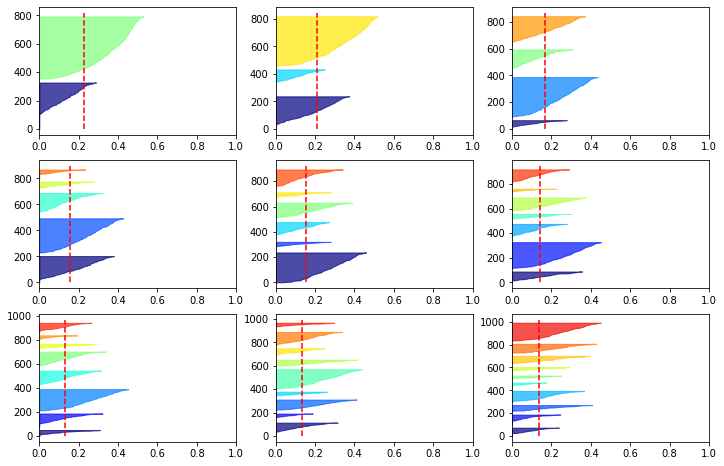

In [25]:
fig, ax1 = plt.subplots(3,3, figsize=(12,8))
ax1 = ax1.flatten()

for i, k in enumerate(range(2,11)):
    
    model = kmeans_models[k-1]
    
    plot_model_silhouettes(ax1[i], model, X)

In [26]:
scores = [silhouette_score(X, model.labels_) for model in kmeans_models[1:]]
print("Silhouette Scores for each k value:")
for k, score in zip(range(2, k_max+1), scores):
    print(f"k = {k}: {score}")

Silhouette Scores for each k value:
k = 2: 0.22754150447301869
k = 3: 0.21180465120143865
k = 4: 0.16767697195854728
k = 5: 0.15575096961981583
k = 6: 0.15594102541195057
k = 7: 0.14421527083197364
k = 8: 0.1301817178878161
k = 9: 0.1353671878530904
k = 10: 0.1356951320159562


k at 2 or 3 is most acceptable. However, k = 2 would be the best for clustering as it is the highest value in the options at 0.22654

## PCA + K-means

In [27]:
np.random.seed(123) #set the seed in numpy
tf.random.set_seed(123)  #set the seed in tensorflow

pca2 = PCA(n_components = 2)
principalComponentsAnalysis = pca2.fit_transform(X_scaled)
principalComponentsAnalysis_df = pd.DataFrame(data = principalComponentsAnalysis, columns = ['PC1', 'PC2'])

In [28]:
principalComponentsAnalysis_df

,PC1,PC2
0,1.368228,-0.861080
1,-1.546917,0.151752
2,0.067790,-0.992045
3,-1.899454,0.542602
4,1.230418,3.594105
...,...,...
763,2.203590,-1.634939
764,-0.385525,0.483752
765,-0.706584,-0.557999
766,-0.726674,-0.464134


In [29]:
k = 3
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans.fit(X_scaled)

kmeans.inertia_

4297.087030055034

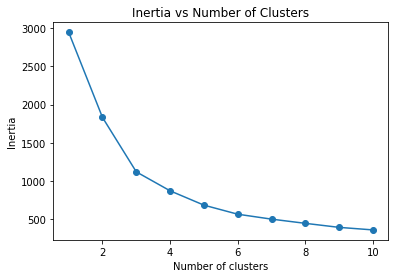

In [30]:
k_max = 10
for k in range(1, 11):
    kmeans_models = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(principalComponentsAnalysis_df)
                     for k in range(1, k_max+1)]
inertias = [model.inertia_ for model in kmeans_models]
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Inertia vs Number of Clusters')
plt.show()

Optimal value for k is 3, so I will run 3 clusters.

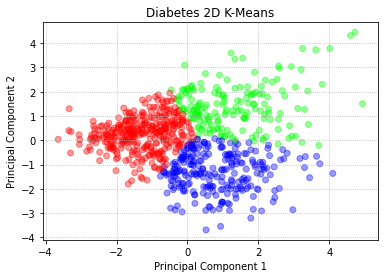

In [31]:
k_means_cluster = KMeans(n_clusters=3).fit(principalComponentsAnalysis_df)
plt.scatter(principalComponentsAnalysis_df['PC1'], principalComponentsAnalysis_df['PC2'], c=k_means_cluster.labels_, cmap=plt.cm.brg, alpha=0.4)
plt.title("Diabetes 2D K-Means")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(linestyle="dotted")
plt.show()

In [32]:
labels1 = kmeans.labels_

# To see how many of the samples were correctly labeled
correct_labels1 = sum(y == labels1)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels1, y.size))

Result: 215 out of 768 samples were correctly labeled.


In [33]:
print('Accuracy score: {0:0.2f}'. format(correct_labels1/float(y.size)))

Accuracy score: 0.28


Slightly better with a dimensionality reduction (PCA) of 2. Obtained an accuracy of 23%.

In [34]:
pca3 = PCA(n_components=3)
principalComponentsAnalysis3 = pca3.fit_transform(X_scaled)
principalComponentsAnalysis_df3 = pd.DataFrame(data = principalComponentsAnalysis3, columns = ['PC1', 'PC2', 'PC3'])
principalComponentsAnalysis_df3

,PC1,PC2,PC3
0,1.368228,-0.861080,0.114780
1,-1.546917,0.151752,-0.553992
2,0.067790,-0.992045,1.792717
3,-1.899454,0.542602,-0.374672
4,1.230418,3.594105,2.286724
...,...,...,...
763,2.203590,-1.634939,-0.637140
764,-0.385525,0.483752,-0.749701
765,-0.706584,-0.557999,0.385952
766,-0.726674,-0.464134,0.399889


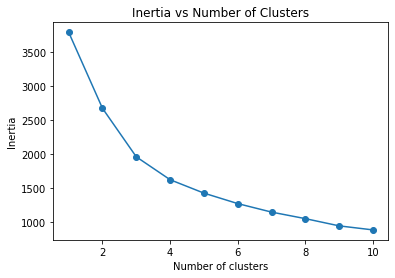

In [35]:
k_max = 10
for k in range(1, 11):
    kmeans_models = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(principalComponentsAnalysis_df3)
                     for k in range(1, k_max+1)]
    
# Extract the inertias from the trained KMeans models    
inertias = [model.inertia_ for model in kmeans_models]
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Inertia vs Number of Clusters')
plt.show()

No handles with labels found to put in legend.


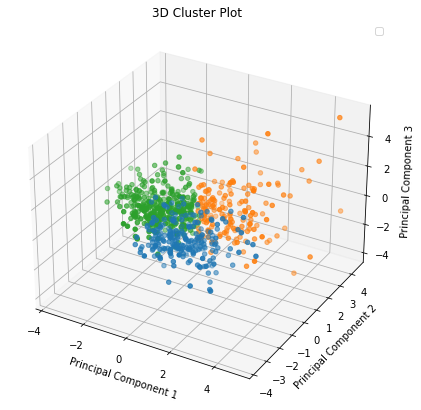

In [36]:
np.random.seed(123) #set the seed in numpy
tf.random.set_seed(123)  #set the seed in tensorflow

principalComponentsAnalysis_df3['Cluster'] = kmeans.labels_

# 3D Scatter Plot
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
unique_labels = principalComponentsAnalysis_df3['Cluster'].unique()

# Scatter plot for each cluster
for cluster_label in range(k):
    cluster_points = principalComponentsAnalysis_df3[principalComponentsAnalysis_df3['Cluster'] == cluster_label]
    ax.scatter(cluster_points['PC1'], cluster_points['PC2'], cluster_points['PC3'])

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Cluster Plot')
ax.legend()

plt.show()

In [37]:
kmeans = KMeans(n_clusters=3).fit(principalComponentsAnalysis_df3)

In [38]:
labels2 = kmeans.labels_

# To see how many of the samples were correctly labeled
correct_labels2 = sum(y == labels2)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels2, y.size))

Result: 422 out of 768 samples were correctly labeled.


In [39]:
print('Accuracy score: {0:0.2f}'. format(correct_labels2/float(y.size)))

Accuracy score: 0.55


Slightly better with a dimensionality reduction (PCA) of 3. Obtained an accuracy of 54% (big improvement from K-means without the PCA and the K-means with the PCA of 2).

# Supervised ML Algorithms

## Artificial Neural Network (ANN)

In [40]:
# Splitting the data into input and output
X = df.iloc[:, 0:8]
y = df.iloc[:, 8]
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,30.5,33.6,0.627,50
1,1,85.0,66.0,29.0,30.5,26.6,0.351,31
2,8,183.0,64.0,23.0,30.5,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2,122.0,70.0,27.0,30.5,36.8,0.340,27
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1,126.0,60.0,23.0,30.5,30.1,0.349,47


In [41]:
# Split the data into training and testing sets, with 80% of the data for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5), # Added for robustness of the model
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Sigmoid in the output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [43]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))

Epoch 1/10
20/20 [==============================] - 1s 13ms/step - loss: 0.8163 - accuracy: 0.5961 - val_loss: 0.6270 - val_accuracy: 0.6494
Epoch 2/10
20/20 [==============================] - 0s 6ms/step - loss: 0.7378 - accuracy: 0.6596 - val_loss: 0.5957 - val_accuracy: 0.6818
Epoch 3/10
20/20 [==============================] - 0s 4ms/step - loss: 0.6368 - accuracy: 0.7020 - val_loss: 0.5769 - val_accuracy: 0.7013
Epoch 4/10
20/20 [==============================] - 0s 4ms/step - loss: 0.6163 - accuracy: 0.7068 - val_loss: 0.5622 - val_accuracy: 0.7338
Epoch 5/10
20/20 [==============================] - 0s 4ms/step - loss: 0.5943 - accuracy: 0.7280 - val_loss: 0.5529 - val_accuracy: 0.7532
Epoch 6/10
20/20 [==============================] - 0s 6ms/step - loss: 0.5969 - accuracy: 0.7036 - val_loss: 0.5467 - val_accuracy: 0.7468
Epoch 7/10
20/20 [==============================] - 0s 6ms/step - loss: 0.5510 - accuracy: 0.7296 - val_loss: 0.5390 - val_accuracy: 0.7468
Epoch 8/10
20/20 [=

### Plotting the history

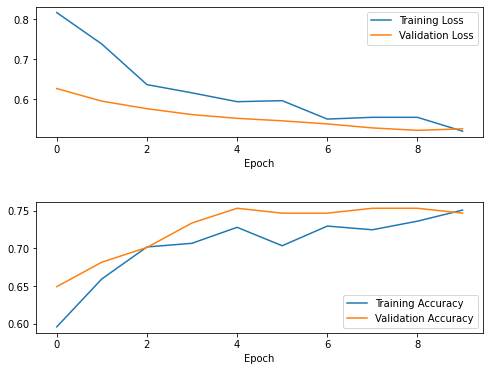

In [44]:
# Create a df from the training history
df_updated = pd.DataFrame(history.history)

fig, ax1 = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={'hspace': 0.5})

# Plot Training Loss and Validation Loss in the first subplot (ax1[0])
ax1[0].plot(df_updated['loss'], label = 'Training Loss')
ax1[0].plot(df_updated['val_loss'], label = 'Validation Loss')
ax1[0].legend()  # Display legend
ax1[0].set_xlabel('Epoch')  # Set label for x-axis

# Plot Training Accuracy and Validation Accuracy in the second subplot (ax1[1])
ax1[1].plot(df_updated['accuracy'], label = 'Training Accuracy')
ax1[1].plot(df_updated['val_accuracy'], label = 'Validation Accuracy')
ax1[1].legend() 
ax1[1].set_xlabel('Epoch')

plt.show()

In [45]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

5/5 [==============================] - 0s 1ms/step - loss: 0.5268 - accuracy: 0.7468
Test Accuracy: 74.68%


## Naïve Bayes Classifier

In [46]:
# Split the data into features and target
X1 = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y1 = df['Outcome']
X

# Split the data into training and testing sets, with 80% of the data for training and 20% for testing
X_train_continuous, X_test_continuous, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
X_train_continuous

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84.0,69.105469,23.0,30.5,32.0,0.304,21
618,9,112.0,82.000000,24.0,30.5,28.2,1.282,50
346,1,139.0,46.000000,19.0,83.0,28.7,0.654,22
294,0,161.0,50.000000,23.0,30.5,21.9,0.254,65
231,6,134.0,80.000000,37.0,370.0,46.2,0.238,46
...,...,...,...,...,...,...,...,...
71,5,139.0,64.000000,35.0,140.0,28.6,0.411,26
106,1,96.0,122.000000,23.0,30.5,22.4,0.207,27
270,10,101.0,86.000000,37.0,30.5,45.6,1.136,38
435,0,141.0,69.105469,23.0,30.5,42.4,0.205,29


In [47]:
# Create Gaussian Naïve Bayes classifier
gnb = GaussianNB()

# Fit the GNB classifier to the continuous feature to training set
gnb.fit(X_train_continuous, y_train)

GaussianNB()

In [48]:
# Make predictions using the GNB on the continuous features
y_pred_continuous = gnb.predict(X_test_continuous)
y_test

668    0
324    0
624    0
690    0
473    0
      ..
355    1
534    0
344    0
296    1
462    0
Name: Outcome, Length: 154, dtype: int64

### Characterizing Model Performance on the Testing Data
- Displays performance metrics

In [49]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_continuous)
acc = accuracy_score(y_test, y_pred_continuous)

# Sensitivity = TPR = TP / (TP + FN)
sensitivity = cm[1,1] / (cm[1,1] + cm[1,0])
print('Sensitivity (TPR) = ', sensitivity)

#Specifity = TNR = TN / (TN + FP)
specifity = cm[0,0] / (cm[0,0] + cm[0,1])
print('Specifity (TNR) =', specifity)
print('Accuracy on test set =', acc)
print('---------------------------------------')
# Prints the precision, recall, f1-score, accuracy
print(classification_report(y_test, y_pred_continuous))

Sensitivity (TPR) =  0.6909090909090909
Specifity (TNR) = 0.7878787878787878
Accuracy on test set = 0.7532467532467533
---------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.79      0.80        99
           1       0.64      0.69      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154



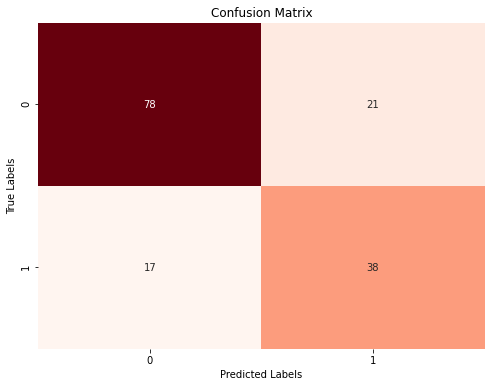

In [50]:
# Print CM heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### ROC Curve summarizing model performance
- A comprehensive performance of the classifier's performance.
- Choose to include this as it distinguishes between the two classes (diabetic or non-diabetic) by varying the threshold for classifying instances (helps with TPR / FPR)

Text(0.5, 1.0, 'Testing Data, AUC = 0.8303')

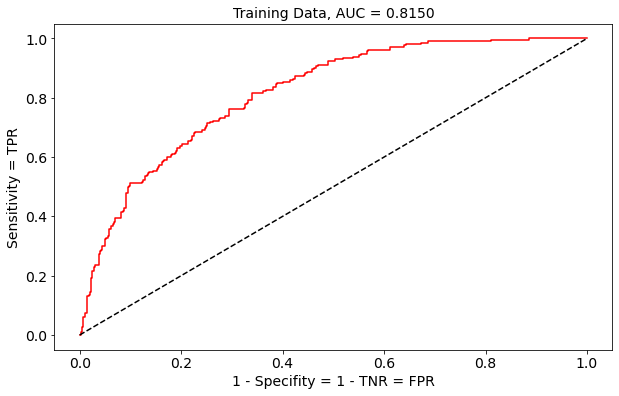

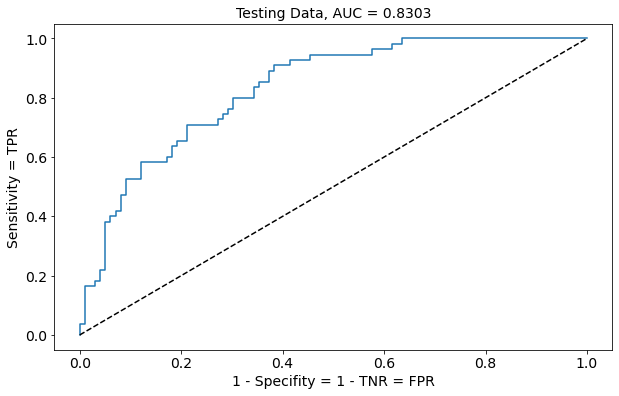

In [51]:
# Training Data
# Predict probabilities on the training data
y_train_prob = gnb.predict_proba(X_train_continuous)[:, 1]
FPR, TPR, thresholds = roc_curve(y_train, y_train_prob)

Y = TPR # True Positive Rate
X = FPR # False Positive Rate

fig2, ax2 = plt.subplots(1, 1, figsize=(10,6))

ax2.step(FPR, TPR, linewidth= 1.5, color = 'red')

# ROC curve
ax2.plot([0,1], [0,1], '--', color = 'black')


fs = 14
ax2.set_xlabel('1 - Specifity = 1 - TNR = FPR', fontsize=fs)
ax2.set_ylabel('Sensitivity = TPR', fontsize=fs)
ax2.tick_params(axis='both', labelsize=fs)

AUC = np.trapz(TPR, FPR)
AUC # Area Under Curve
ax2.set_title(f'Training Data, AUC = {AUC:.4f}', fontsize=fs)

# Testing Data
# Predict probabilities on the testing data
y_test_prob = gnb.predict_proba(X_test_continuous)[:, 1]
FPR, TPR, thresholds = roc_curve(y_test, y_test_prob)

Y = TPR # True Positive Rate
X = FPR # False Positive Rate

fig1, ax1 = plt.subplots(1, 1, figsize=(10,6))

ax1.step(FPR, TPR, linewidth= 1.5)

# ROC curve
ax1.plot([0,1], [0,1], '--', color = 'black')


fs = 14
ax1.set_xlabel('1 - Specifity = 1 - TNR = FPR', fontsize=fs)
ax1.set_ylabel('Sensitivity = TPR', fontsize=fs)
ax1.tick_params(axis='both', labelsize=fs)

AUC = np.trapz(TPR, FPR)
AUC
ax1.set_title(f'Testing Data, AUC = {AUC:.4f}', fontsize=fs)

### Precision-Recall Curve summarizing model performance on both the training and testing data (Naïve Bayes)

(0.0, 1.0)

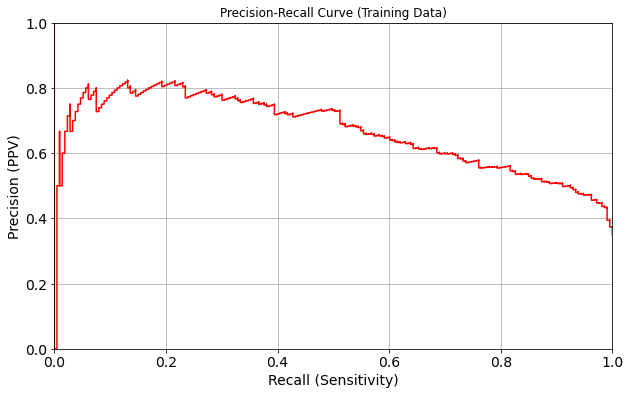

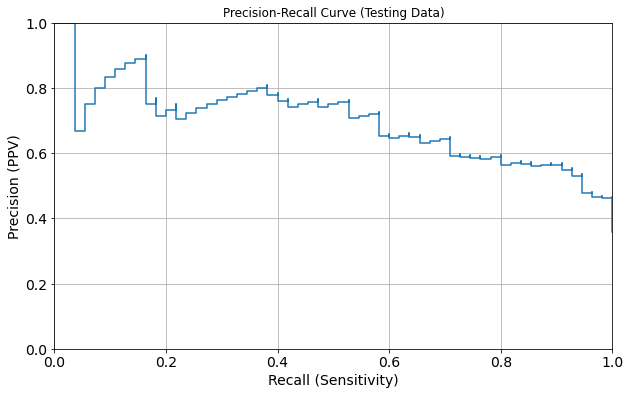

In [52]:
# Plotting Precision-Recall Curve, Training Data using Naive Bayes
precisions, recalls, thresholds = precision_recall_curve(y_train, y_train_prob)


fig3, ax3 = plt.subplots(1, 1, figsize=(10,6))

ax3.step(recalls, precisions, linewidth=1.5, color = 'red')
ax3.grid()

fs = 14
ax3.set_xlabel('Recall (Sensitivity)', fontsize=fs)
ax3.set_ylabel('Precision (PPV)', fontsize=fs)
ax3.tick_params(axis='both', labelsize=fs)

ax3.set_title('Precision-Recall Curve (Training Data)')
ax3.set_ylim([0, 1])
ax3.set_xlim([0, 1])

# Plotting Precision-Recall Curve, Testing Data using Naive Bayes
precisions, recalls, thresholds = precision_recall_curve(y_test, y_test_prob)


fig3, ax3 = plt.subplots(1, 1, figsize=(10,6))

ax3.step(recalls, precisions, linewidth=1.5)
ax3.grid()

ax3.set_xlabel('Recall (Sensitivity)', fontsize=fs)
ax3.set_ylabel('Precision (PPV)', fontsize=fs)
ax3.tick_params(axis='both', labelsize=fs)

ax3.set_title('Precision-Recall Curve (Testing Data)')
ax3.set_ylim([0, 1])
ax3.set_xlim([0, 1])

# Results

## Unsupervised ML - K-means Clustering:
- **Result:** Applying K-Means clustering without any dimensionality reduction yielded a weak classification accuracy of 17%. Only 132 out of 768 samples were correctly labeled by our unsupervised model.
- **Silhouette values:** Using silhouette values, it was found that using clusters of either 2 or 3 is reasonable according to a higher mean silhouette value. k = 2 has a score of 0.22754150447301869.
- **K-Means with PCA of 2:**
    - **Optimal K:** Utilizing Principal Component Analysis (PCA) to reduce dimensionality, we determined the optimal value for K to be 3.
    - **Result:** With K-Means clustering applied to the dataset reduced to 2 principal components, 178 out of 768 samples were correctly labeled, resulting in an accuracy of 23%.
- **K-Means with PCA of 3:**
    - **Result:** Further increasing the number of principal components to 3 improved the model's performance, correctly labeling 418 out of 768 samples with an accuracy score of 54%.
    
## Supervised ML - Artificial Neural Network (ANN):
- **Training Outcome:**
    - **Accuracy:** The Artificial Neural Network achieved a test accuracy of 74.68%.
    
## Supervised ML - Naive Bayes Classifier:
- **Training and Testing Results:**
    - Utilizing 80% of the data for training and 20% for testing, the Naive Bayes classifier demonstrated promising performance.
    - **Sensitivity (True Positive Rate):** 69.09%
    - **Specificity (True Negative Rate):** 78.79%
    - **Accuracy on Test Set:** 75.32%
- **Confusion Matrix:**
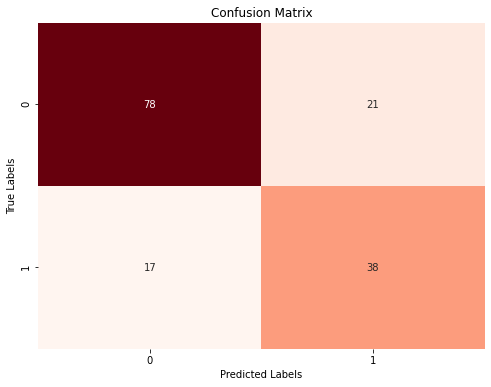
- **Area Under the Curve (AUC):**
    - **Training Data AUC:** 0.8150
    - **Testing Data AUC:** 0.8303
    - The two AUC scores are both very close to 1.00, which indicate they are both great for distinguishing diabetes (0 and 1).
    - Naive Bayes: AUC (0.8303), known for simplicity, which also explains why its a good choice and has a high score.

# Discussion

## About Results
- Note: I removed outliers and replaced them with mean or median values depending on skewness. This was done to improve model performance, interpretability, robustness, reduction of skewness, and enhanced clustering.
- PCA of 2 was applied to reduce dimensionality of the dataset. Reducing the data to two dimensions makes it possible to visualize clusters in a 2d space. Sometimes higher-dimensional representations may be needed to capture the complexity of the structure. Adding a third component allows for the representation of additional variability in the data.
    - Thus a PCA of 2 and 3 were done - to enhance interpretability and visualize clusters better.
- The plotting history is what would be expected. The decreasing trend in both training and validation loss indicates that the model is both learning and generalizing well. There is no overfitting since they are both steadily decreasing (just some small increases in validation loss). The accuracy is also what would be expected as there is no large gap between the training accuracy and validation accuracy (so no real indication of overfitting).
- The precision-recall curves are what would be expected. At the thresholds with low recall, the precision is high, and at very high recall, the precision drops (With higher recall (outcome = 1; diabetic), precision (outcome = 0; non-diabetic)) goes down.
- The two AUC scores are both very close to 1.00, which indicate they are both great for distinguishing diabetes (0 and 1).
- Naive Bayes: AUC (0.8303), known for simplicity, which also explains why its a good choice and has a high score.


## Implications
- **K-Means Clustering:**
    - The unsupervised K-Means clustering yielded limited accuracy, suggesting the need for more advanced techniques when dealing with complex binary classification.
    - Relying on centroid-based partitioning, may encounter challenges when confronted with the diverse structures present in the diabetes dataset.
- **Supervised ML - Artificial Neural Network (ANN):**
    - The Artificial Neural Network demonstrated improved accuracy compared to unsupervised K-Means, showcasing the effectiveness of supervised learning in capturing intricate patterns.
    - Furthermore, the ANN's architecture, involving multiple layers and adaptive learning, enables it to adapt to the underlying complexities of the diabetes dataset. The intricacies of the relationships between features and the outcome variable are more effectively captured through the iterative training process of the neural network.
- **Supervised ML - Naive Bayes Classifier:**
    - The Naive Bayes classifier, with its high sensitivity and specificity, presents a robust solution for diabetes prediction, particularly in medical applications where interpretability is crucial.
    - The high sensitivity of the model ensures a low rate of false negatives, crucial for identifying individuals at risk of diabetes, while its specificity minimizes false positives, enhancing the precision of predictions.
    - Moreover, the interpretability of the Naive Bayes classifier contributes to its appeal in medical applications. Healthcare professionals can readily comprehend the model's decision-making process, making it easier to trust and integrate into clinical workflows. 

 
## Limitations
- **Dataset Characteristics:**
     - The dataset's inherent complexity and potential noise may have impacted the performance of unsupervised methods (tried to ameliorate this by removing outliers with the mean/median depending on skewness).
- **Model Assumptions:**
    - K-Means expects clusters to have a similar shape, and Naive Bayes assumes that features are not connected. If these expectations are not met, it might affect how well the models work.
- **Feature Engineering:**
    - Limited feature engineering might have affected the models' ability to capture subtle patterns, especially in the case of unsupervised learning.
    
## Future Directions
- **Feature Engineering:**
    - Explore additional feature engineering techniques to enhance the models' ability to capture relevant patterns.
- **Advanced Models:**
    - Consider more sophisticated supervised and unsupervised learning models that can handle the dataset's complexity.
- **Ensemble Methods:**
    - Implement ensemble methods to combine the strengths of multiple models for improved predictions.

## Best Model
- Based on the results, the Naive Bayes Classifier model is a strong choice for diabetes diagnosis/classification. In contrast to the other models utilized, this model exceeds in accurately identifying diabetes diagnosis.

## Conclusion
- In conclusion, the results suggest that supervised learning models, particularly the Naive Bayes classifier and Artificial Neural Network, outperform unsupervised K-Means clustering for diabetes prediction. However, there is room for improvement through further feature engineering and the exploration of advanced modeling techniques. The Naive Bayes classifier stands out as a promising and interpretable model, demonstrating a potential applicability in real-world medical scenarios.